In [39]:
import jax.numpy as jnp
from jax import grad,vmap,jit
from jax.lax import scan
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functools import partial
from scipy.special import wofz
plt.style.use('bmh')

In [31]:

def f1(x,y):
    z=x+y*(1j)
    a=1.0/(2.0*z*z)
    q=(1j)/(z*jnp.sqrt(jnp.pi))*(1.0 + a*(1.0 + a*3.0))
    return jnp.real(q)

def f2(x,y):
    z=x+y*(1j)
    a=1.0/(2.0*z*z)
    q=(1j)/(z*jnp.sqrt(jnp.pi))*(1.0 + a*(1.0 + a*(3.0 + a*15.0)))
    return jnp.real(q)

def f3(x,y):
    z=x+y*(1j)
    a=1.0/(2.0*z*z)
    q=(1j)/(z*jnp.sqrt(jnp.pi))*(1.0 + a*(1.0 + a*(3.0 + a*(15.0+a*105.0))))
    return jnp.real(q)



In [28]:
f3(10.0,10.0)

DeviceArray(0.02827947, dtype=float32)

In [29]:
h=jit(grad(f3))

In [30]:
%timeit h(1.0,1.0)

142 µs ± 1.32 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [36]:
fv3=jit(vmap(f3,(0,None),0))
fv2=jit(vmap(f2,(0,None),0))
fv1=jit(vmap(f1,(0,None),0))

In [48]:
xarr=jnp.logspace(-1,3,100)
xarrc=np.logspace(-1,3,100)
ref=np.real(wofz(xarrc+1.0*(1j)))


Text(0.5, 0, 'x')

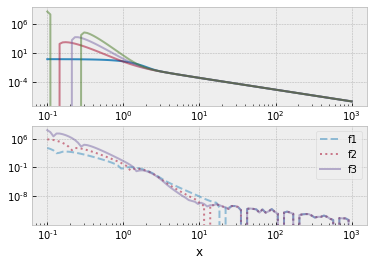

In [52]:
aref=0.1
ref=np.real(wofz(xarrc+aref*(1j)))

fig=plt.figure()
ax=fig.add_subplot(211)
ax.plot(xarr,ref)
ax.plot(xarr,fv1(xarr,aref),alpha=0.5)
ax.plot(xarr,fv2(xarr,aref),alpha=0.5)
ax.plot(xarr,fv3(xarr,aref),alpha=0.5)
plt.yscale("log")
plt.xscale("log")
ax=fig.add_subplot(212)
ax.plot(xarr,np.abs(ref - fv1(xarr,aref)),alpha=0.5,ls="dashed",label="f1")
ax.plot(xarr,np.abs(ref - fv2(xarr,aref)),alpha=0.5,ls="dotted",label="f2")
ax.plot(xarr,np.abs(ref - fv3(xarr,aref)),alpha=0.5,ls="solid",label="f3")
plt.legend()
plt.yscale("log")
plt.xscale("log")
plt.xlabel("x")